In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import csv
import statsmodels.api as sm

In [8]:
ob = pd.read_csv('Data/Obesity-prevalence-by-state-2021.csv')

In [9]:
sat = pd.read_csv('Data/sat2021.csv')
sat = sat.dropna()

In [10]:
money = pd.read_csv('Data/income2021.csv').dropna()

In [11]:
def clean(string):
    string = string.replace('.', '')
    string = string.replace(' ','')
    string = string.replace(',','')
    return string
def convnum(text):
    text=float(text)
    return text

In [12]:
sat['State'] = sat['State'].apply(clean)
ob['State'] = ob['State'].apply(clean)
money['State']= ob['State'].apply(clean)
money['Income'] = money['Income'].apply(clean)

In [13]:
joined = ob.merge(sat, how='outer')
joined = joined.merge(money, how='outer')
joined['Prevalence'] = joined['Prevalence'].apply(convnum)
joined['Income'] = joined['Income'].apply(convnum)

In [14]:
joined.sort_values(by='Average Total Score', ascending = False)

,State,Prevalence,95% CI,Number of Test-Takers,Percentage of State’s 2021 Graduates*,Average ERW** Section Score,Average Math Section Score,Average Total Score,Income,Preceding\r\nPeriod,Year Ago\r\nfrom Period
21,Minnesota,32.4,"(31.5, 33.3)","1,709",2%,626.0,636.0,1263.0,80441.0,"82,431","82,431"
32,NorthDakota,35.2,"(33.6, 36.9)",96,1%,631.0,628.0,1258.0,68882.0,"67,109","67,109"
25,Nebraska,35.9,"(34.8, 37.1)",379,2%,625.0,620.0,1246.0,78109.0,"75,622","75,622"
13,Iowa,36.4,"(35.1, 37.7)",625,2%,623.0,620.0,1243.0,72429.0,"72,030","72,030"
14,Kansas,36.0,"(35.1, 37.0)",721,2%,619.0,623.0,1243.0,75979.0,"76,495","76,495"
42,Utah,30.9,"(29.8, 32.1)",654,1%,621.0,617.0,1238.0,87649.0,"87,915","87,915"
48,Wyoming,32.0,"(29.9, 34.1)",99,2%,626.0,607.0,1233.0,71052.0,"68,506","68,506"
24,Montana,31.8,"(30.3, 33.3)",489,5%,618.0,607.0,1225.0,64999.0,"59,390","59,390"
40,Tennessee,35.0,"(33.1, 36.8)","2,625",4%,618.0,602.0,1220.0,62166.0,"57,542","57,542"
23,Missouri,37.3,"(35.9, 38.7)","1,796",2%,614.0,606.0,1219.0,63594.0,"65,081","65,081"


In [15]:
Score = joined['Average Total Score']
X = joined[['Prevalence', 'Income']]

In [16]:
X = sm.add_constant(X)
model = sm.OLS(Score, X).fit()
print(model.summary())

NameError: name 'score' is not defined

In [17]:
df = joined
X = df[['Prevalence', 'Income']]
X = sm.add_constant(X)
y = df['Average Total Score']
model = sm.OLS(y, X).fit()

# Print original regression results
print("Original Regression Results:")
print(model.summary())

# Step 2: Partial regression to obtain residuals
X_partial = df[['Income']]
X_partial = sm.add_constant(X_partial)
model_partial = sm.OLS(y, X_partial).fit()
residuals = model_partial.resid

# Step 3: Isolate Prevalence effect
df['Residuals Average Total Score'] = residuals

# Step 4: Regression with isolated Prevalence effect
X_isolated = df[['Prevalence']]
X_isolated = sm.add_constant(X_isolated)
y_isolated = df['Residuals Average Total Score']
model_isolated = sm.OLS(y_isolated, X_isolated).fit()

# Print regression with isolated Prevalence effect results
print("\nRegression with Isolated Prevalence Effect:")
print(model_isolated.summary())

Original Regression Results:
                             OLS Regression Results                            
Dep. Variable:     Average Total Score   R-squared:                       0.031
Model:                             OLS   Adj. R-squared:                 -0.012
Method:                  Least Squares   F-statistic:                    0.7262
Date:                 Fri, 04 Aug 2023   Prob (F-statistic):              0.489
Time:                         12:22:06   Log-Likelihood:                -286.42
No. Observations:                   49   AIC:                             578.8
Df Residuals:                       46   BIC:                             584.5
Df Model:                            2                                         
Covariance Type:             nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        

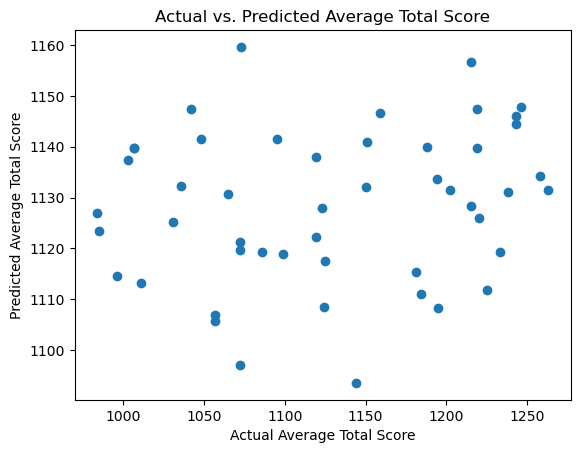

In [18]:
plt.scatter(Score, model.predict(X))
plt.xlabel('Actual Average Total Score')
plt.ylabel('Predicted Average Total Score')
plt.title('Actual vs. Predicted Average Total Score')
plt.show()

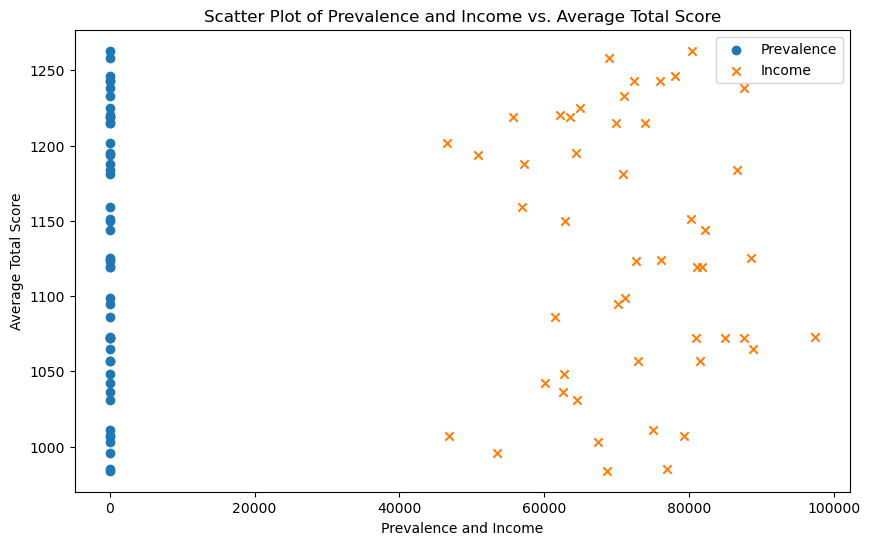

In [19]:
plt.figure(figsize=(10, 6))
plt.scatter(joined['Prevalence'], joined['Average Total Score'], label='Prevalence', marker='o')
plt.scatter(joined['Income'], joined['Average Total Score'], label='Income', marker='x')
plt.xlabel('Prevalence and Income')
plt.ylabel('Average Total Score')
plt.title('Scatter Plot of Prevalence and Income vs. Average Total Score')
plt.legend()
plt.show()

Text(0.5, 0, 'Average SAT Score')

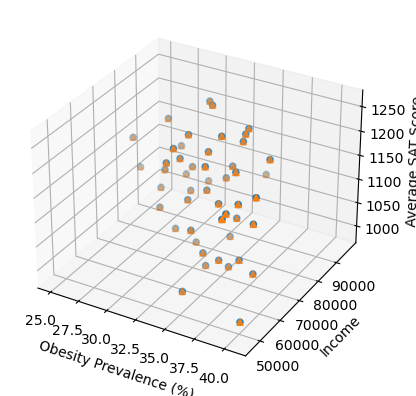

In [20]:

fig = plt.figure()
ax = fig.add_subplot(projection='3d')

n = 100

# For each set of style and range settings, plot n random points in the box
# defined by x in [23, 32], y in [0, 100], z in [zlow, zhigh].
for m, zlow, zhigh in [('o', -50, -25), ('^', -30, -5)]:
    xs = joined['Prevalence']
    ys = joined['Income']
    zs = joined['Average Total Score']
    ax.scatter(xs, ys, zs, marker=m)

ax.set_xlabel("Obesity Prevalence (%)")
ax.set_ylabel('Income')
ax.set_zlabel('Average SAT Score')


In [21]:
plt.show()

NameError: name 'axes3d' is not defined

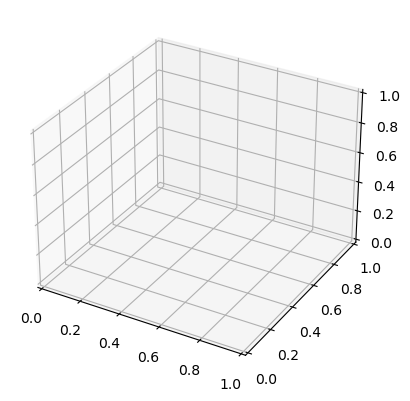

In [22]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

# Grab some example data and plot a basic wireframe.
X, Y, Z = axes3d.get_test_data(0.05)
ax.plot_wireframe(X, Y, Z, rstride=10, cstride=10)

# Set the axis labels
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

# Rotate the axes and update
for angle in range(0, 360*4 + 1):
    # Normalize the angle to the range [-180, 180] for display
    angle_norm = (angle + 180) % 360 - 180

    # Cycle through a full rotation of elevation, then azimuth, roll, and all
    elev = azim = roll = 0
    if angle <= 360:
        elev = angle_norm
    elif angle <= 360*2:
        azim = angle_norm
    elif angle <= 360*3:
        roll = angle_norm
    else:
        elev = azim = roll = angle_norm

    # Update the axis view and title
    ax.view_init(elev, azim, roll)
    plt.title('Elevation: %d°, Azimuth: %d°, Roll: %d°' % (elev, azim, roll))

    plt.draw()
    plt.pause(.001)

In [ ]:
test = pd.read_csv('Data/SAGDP1__ALL_AREAS_1997_2021.csv')

In [ ]:
test.head(20)